In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Importing the dataset
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
X = dataset.iloc[:, [2, 3]].values.astype(float)
y = dataset.Purchased.values

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4)

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Fitting SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',  probability=True)    # probability=True enables `predict_proba` function
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
y_pred = classifier.predict(X_test)

In [8]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[66,  6],
       [ 2, 26]], dtype=int64)

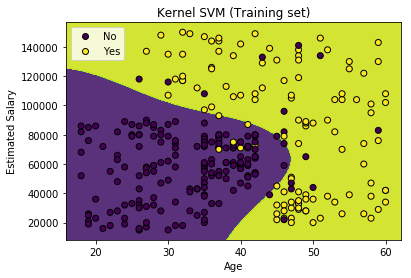

In [9]:
# Make a meshgrid of the span of the data to use for visualizing the background / decision boundary
def grid(X1, X2, n=500, margin=1/20):
    dx1 = margin * (X1.max() - X1.min())
    dx2 = margin * (X2.max() - X2.min())
    return np.meshgrid(np.linspace(X1.min() - dx1, X1.max() + dx1, n), np.linspace(X2.min() - dx2, X2.max() + dx2, n))

# Visualizing the training set results
def visualize_classification(classifier, X, y, scaler=None, title="", proba=False, x1label="x1", x2label="x2", 
                             ylabel=("No", "Yes"), return_fig=False):
    """Visualize the results of a classification with two variables"""
    
    # Make scaled and unscaled versions of X for predicting and visualizing respectively
    X_orig = scaler.inverse_transform(X) if scaler else X
    X1o, X2o = grid(X_orig[:, 0], X_orig[:, 1])                  # Unscaled X set (for visualization)
    X1s, X2s = grid(X[:, 0], X[:, 1]) if scaler else (X1, X2)    # Scaled X set (for predicting)
    
    fig = plt.figure()    # Initialize figure
    
    # Plot decision boundary / decision regions
    plt.contourf(X1o, X2o, 
                 classifier.predict_proba(np.array([X1s.ravel(), X2s.ravel()]).T)[:, 1].reshape(X1s.shape) if proba else
                 classifier.predict(np.array([X1s.ravel(), X2s.ravel()]).T).reshape(X1s.shape), alpha=0.9)
    
    # Plot original data
    plt.scatter(X_orig[:, 0], X_orig[:, 1], c=y, edgecolors="black")
    
    # Make the plot
    plt.title(title)
    plt.legend((plt.Line2D((0, 1), (0, 0), marker='o', color=mpl.cm.get_cmap()(0.), markeredgecolor='black', linestyle=''),
                plt.Line2D((0, 1), (0, 0), marker='o', color=mpl.cm.get_cmap()(1.), markeredgecolor='black', linestyle='')), 
                ylabel)
    plt.xlabel(x1label)
    plt.ylabel(x2label)
    
    if return_fig: return fig
    else: plt.show()

visualize_classification(classifier, X_train, y_train, scaler=scaler, x1label="Age", x2label="Estimated Salary", 
          title="Kernel SVM (Training set)")

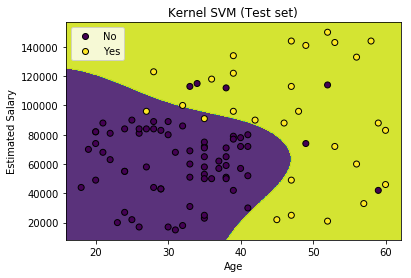

In [10]:
visualize_classification(classifier, X_test, y_test, scaler=scaler, x1label="Age", x2label="Estimated Salary", 
          title="Kernel SVM (Test set)")

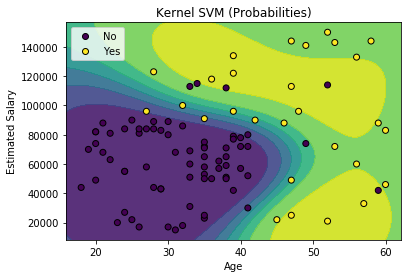

In [11]:
visualize_classification(classifier, X_test, y_test, scaler=scaler, x1label="Age", x2label="Estimated Salary", 
          title="Kernel SVM (Probabilities)", proba=True)